<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries-and-models" data-toc-modified-id="Libraries-and-models-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries and models</a></span></li><li><span><a href="#Reference-device-shorted-to-ground" data-toc-modified-id="Reference-device-shorted-to-ground-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reference device shorted to ground</a></span><ul class="toc-item"><li><span><a href="#100-uA-bias-current" data-toc-modified-id="100-uA-bias-current-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>100 uA bias current</a></span><ul class="toc-item"><li><span><a href="#relative-shift-fit" data-toc-modified-id="relative-shift-fit-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>relative shift fit</a></span></li><li><span><a href="#absolute-shift-with-partial-geometric-inductance" data-toc-modified-id="absolute-shift-with-partial-geometric-inductance-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>absolute shift with partial geometric inductance</a></span></li></ul></li><li><span><a href="#200-uA-bias-current" data-toc-modified-id="200-uA-bias-current-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>200 uA bias current</a></span><ul class="toc-item"><li><span><a href="#relative-shift-fit" data-toc-modified-id="relative-shift-fit-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>relative shift fit</a></span></li><li><span><a href="#absolute-shift-with-partial-geometric-inductance" data-toc-modified-id="absolute-shift-with-partial-geometric-inductance-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>absolute shift with partial geometric inductance</a></span></li></ul></li></ul></li></ul></div>

## Libraries and models

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import stlabutils
import pickle
from src.algo_peakheights import S11_fitting_full
from src.model_currentbias import f0Lkshift, f0Lk

In [4]:
import lmfit

In [5]:
Lkprime = 154e-9 #H/m kinetic inductance per unit length
Lgprime = 424e-9 #H/m geometric inductance per unit length
alpha = Lkprime/(Lgprime+Lkprime)
alpha

0.2664359861591695

## Reference device shorted to ground

### 100 uA bias current

In [6]:
fpath = glob.glob('data_raw/ref2gnd/_test_F1_2019_04_10_14.34.49_VNA_vs_current_16open/*.dat')
print(fpath)
mydata = stlabutils.readdata.readdat(fpath[0])

['data_raw/ref2gnd/_test_F1_2019_04_10_14.34.49_VNA_vs_current_16open/_test_F1_2019_04_10_14.34.49_VNA_vs_current_16open.dat']
['Frequency (Hz)', 'S21re ()', 'S21im ()', 'S21dB (dB)', 'S21Ph (rad)', 'Power (dBm)', 'T (K)', 'Time (s)', 'Iset (A)']


In [7]:
iset = []
fres = []
dfres = []
temp = []
kext = []
kint = []
dkext = []
dkint = []

for myline in mydata:
    freqs = myline['Frequency (Hz)'].values
    Iset = myline['Iset (A)'].values[0]
    Temp = myline['T (K)'].values[0]
    S11complex = myline['S21re ()'] + 1j * myline['S21im ()']
    S11complex = S11complex.values
    params, _, _, _ = stlabutils.S11fit(freqs, S11complex, ftype='A', doplots=False)
    # parameters
    iset.append(Iset)
    f0 = params['f0'].value
    df0 = params['f0'].stderr
    Qext = params['Qext'].value
    dQext = params['Qext'].stderr
    Qint = params['Qint'].value
    dQint = params['Qint'].stderr
    # appending
    fres.append(f0)
    dfres.append(df0)
    temp.append(Temp)
    Kext = f0/Qext
    Kint = f0/Qint
    kext.append(f0/Qext)
    kint.append(f0/Qint)
    dkext.append((df0/f0+dQext/Qext)*Kext)
    dkint.append((df0/f0+dQint/Qint)*Kint)

iset = np.array(iset)
fres = np.array(fres)
dfres = np.array(dfres)
temp = np.array(temp)
kext = np.array(kext)
kint = np.array(kint)
dkext = np.array(dkext)
dkint = np.array(dkint)

Max index:  1717  Max frequency:  7560190000.0
Peak limits:  1699 1729
Lower edge:  7558930000.0  Center:  7560190000.0  Upper edge:  7561030000.0  Points in width:  30
2001 2001
-0.002853086504983698 7.890134493217417e-13 4332.956337566931 -5.821132702922739e-07
[[Variables]]
    a:   0.18390205 +/- 0.44223293 (240.47%) (init = -0.002853087)
    b:  -5.3421e-11 +/- 1.1783e-10 (220.57%) (init = 7.890134e-13)
    c:   3.9053e-21 +/- 7.8487e-21 (200.98%) (init = 0)
    ap:  4317.89656 +/- 0.78548610 (0.02%) (init = 4332.956)
    bp: -5.8018e-07 +/- 1.0464e-10 (0.02%) (init = -5.821133e-07)
    cp:  0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b)   = -1.000
    C(b, c)   = -1.000
    C(ap, bp) = -1.000
    C(a, c)   =  1.000
[[Variables]]
    a:      0.183902 (fixed)
    b:     -5.342065e-11 (fixed)
    c:      3.905292e-21 (fixed)
    ap:     4317.897 (fixed)
    bp:    -5.801814e-07 (fixed)
    cp:     0 (fixed)
    Qint:   15117.7113 +/- 1373.78526 (9.09%) 

[[Variables]]
    a:      0.1991341 (fixed)
    b:     -5.735338e-11 (fixed)
    c:      4.158876e-21 (fixed)
    ap:     4317.808 (fixed)
    bp:    -5.801692e-07 (fixed)
    cp:     0 (fixed)
    Qint:   14762.7712 +/- 1330.93752 (9.02%) (init = 7622.115)
    Qext:   12005.1495 +/- 447.345538 (3.73%) (init = 6822.391)
    f0:     7.5601e+09 +/- 29917.4356 (0.00%) (init = 7.56012e+09)
    theta: -0.03204102 +/- 0.03726538 (116.31%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(f0, theta)  = -0.711
    C(Qint, Qext) =  0.413
QLoaded =  6620.9578704350415
[[Variables]]
    a:      0.98494451 +/- 0.40231849 (40.85%) (init = 0.1991341)
    b:     -2.6758e-10 +/- 1.0715e-10 (40.04%) (init = -5.735338e-11)
    c:      1.8219e-20 +/- 7.1345e-21 (39.16%) (init = 4.158876e-21)
    ap:     4311.16186 +/- 0.64681361 (0.02%) (init = 4317.808)
    bp:    -5.7928e-07 +/- 8.6063e-11 (0.01%) (init = -5.801692e-07)
    cp:     0 (fixed)
    Qint:   14759.1645 +/- 1284.45775 (

[[Variables]]
    a:      0.1219604 (fixed)
    b:     -3.687262e-11 (fixed)
    c:      2.800125e-21 (fixed)
    ap:     4317.562 (fixed)
    bp:    -5.801365e-07 (fixed)
    cp:     0 (fixed)
    Qint:   15331.7932 +/- 1388.92274 (9.06%) (init = 8135.363)
    Qext:   12072.5187 +/- 445.255927 (3.69%) (init = 6457.621)
    f0:     7.5601e+09 +/- 29030.0794 (0.00%) (init = 7.56005e+09)
    theta: -0.03025516 +/- 0.03688403 (121.91%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(f0, theta)  = -0.711
    C(Qint, Qext) =  0.407
QLoaded =  6754.169220520248
[[Variables]]
    a:      0.95715927 +/- 0.39992954 (41.78%) (init = 0.1219604)
    b:     -2.6026e-10 +/- 1.0652e-10 (40.93%) (init = -3.687262e-11)
    c:      1.7736e-20 +/- 7.0921e-21 (39.99%) (init = 2.800125e-21)
    ap:     4310.86638 +/- 0.64305329 (0.01%) (init = 4317.562)
    bp:    -5.7924e-07 +/- 8.5561e-11 (0.01%) (init = -5.801365e-07)
    cp:     0 (fixed)
    Qint:   15293.5298 +/- 1334.60000 (8

[[Variables]]
    a:      0.3497741 (fixed)
    b:     -9.763794e-11 (fixed)
    c:      6.85208e-21 (fixed)
    ap:     4317.758 (fixed)
    bp:    -5.801622e-07 (fixed)
    cp:     0 (fixed)
    Qint:   14285.2270 +/- 1272.00285 (8.90%) (init = 7599.119)
    Qext:   12009.4911 +/- 448.825934 (3.74%) (init = 6840.92)
    f0:     7.5600e+09 +/- 30450.5062 (0.00%) (init = 7.56012e+09)
    theta: -0.03078661 +/- 0.03737689 (121.41%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(f0, theta)  = -0.711
    C(Qint, Qext) =  0.420
QLoaded =  6524.439833758865
[[Variables]]
    a:      1.10244177 +/- 0.40229782 (36.49%) (init = 0.3497741)
    b:     -2.9897e-10 +/- 1.0715e-10 (35.84%) (init = -9.763794e-11)
    c:      2.0316e-20 +/- 7.1342e-21 (35.12%) (init = 6.85208e-21)
    ap:     4311.11393 +/- 0.64588554 (0.01%) (init = 4317.758)
    bp:    -5.7927e-07 +/- 8.5938e-11 (0.01%) (init = -5.801622e-07)
    cp:     0 (fixed)
    Qint:   14480.8559 +/- 1251.82470 (8.64

[[Variables]]
    a:      0.031077 (fixed)
    b:     -1.25897e-11 (fixed)
    c:      1.178142e-21 (fixed)
    ap:     4317.772 (fixed)
    bp:    -5.801641e-07 (fixed)
    cp:     0 (fixed)
    Qint:   15283.2880 +/- 1392.97617 (9.11%) (init = 7907.094)
    Qext:   12196.3584 +/- 455.361904 (3.73%) (init = 6608.845)
    f0:     7.5600e+09 +/- 29262.5552 (0.00%) (init = 7.55991e+09)
    theta: -0.03493592 +/- 0.03733808 (106.88%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(f0, theta)  = -0.711
    C(Qint, Qext) =  0.410
QLoaded =  6783.21894379916
[[Variables]]
    a:      0.88055144 +/- 0.40129694 (45.57%) (init = 0.031077)
    b:     -2.3984e-10 +/- 1.0688e-10 (44.56%) (init = -1.25897e-11)
    c:      1.6376e-20 +/- 7.1164e-21 (43.46%) (init = 1.178142e-21)
    ap:     4311.21857 +/- 0.64530716 (0.01%) (init = 4317.772)
    bp:    -5.7929e-07 +/- 8.5862e-11 (0.01%) (init = -5.801641e-07)
    cp:     0 (fixed)
    Qint:   15093.2109 +/- 1320.33093 (8.75%)

[[Variables]]
    a:      0.0523771 (fixed)
    b:     -1.830522e-11 (fixed)
    c:      1.561472e-21 (fixed)
    ap:     4318.28 (fixed)
    bp:    -5.802322e-07 (fixed)
    cp:     0 (fixed)
    Qint:   14223.9359 +/- 1271.30775 (8.94%) (init = 7500.039)
    Qext:   11840.3177 +/- 442.430106 (3.74%) (init = 6506.075)
    f0:     7.5601e+09 +/- 30753.6619 (0.00%) (init = 7.56005e+09)
    theta: -0.05973252 +/- 0.03737614 (62.57%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(f0, theta)  = -0.711
    C(Qint, Qext) =  0.418
QLoaded =  6461.566975683695
[[Variables]]
    a:      0.84053591 +/- 0.40211434 (47.84%) (init = 0.0523771)
    b:     -2.2918e-10 +/- 1.0710e-10 (46.73%) (init = -1.830522e-11)
    c:      1.5666e-20 +/- 7.1309e-21 (45.52%) (init = 1.561472e-21)
    ap:     4311.09498 +/- 0.64794865 (0.02%) (init = 4318.28)
    bp:    -5.7927e-07 +/- 8.6213e-11 (0.01%) (init = -5.802322e-07)
    cp:     0 (fixed)
    Qint:   14457.4774 +/- 1249.44811 (8.64

[[Variables]]
    a:      0.2873498 (fixed)
    b:     -8.088958e-11 (fixed)
    c:      5.728758e-21 (fixed)
    ap:     4318.076 (fixed)
    bp:    -5.802049e-07 (fixed)
    cp:     0 (fixed)
    Qint:   14813.4306 +/- 1341.50357 (9.06%) (init = 7624.948)
    Qext:   12061.1024 +/- 451.953645 (3.75%) (init = 6414.697)
    f0:     7.5600e+09 +/- 29979.8960 (0.00%) (init = 7.55991e+09)
    theta: -0.04535040 +/- 0.03748175 (82.65%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(f0, theta)  = -0.711
    C(Qint, Qext) =  0.414
QLoaded =  6648.164035759389
[[Variables]]
    a:      1.11173989 +/- 0.40322683 (36.27%) (init = 0.2873498)
    b:     -3.0141e-10 +/- 1.0739e-10 (35.63%) (init = -8.088958e-11)
    c:      2.0475e-20 +/- 7.1506e-21 (34.92%) (init = 5.728758e-21)
    ap:     4311.07020 +/- 0.64712620 (0.02%) (init = 4318.076)
    bp:    -5.7927e-07 +/- 8.6104e-11 (0.01%) (init = -5.802049e-07)
    cp:     0 (fixed)
    Qint:   14880.1936 +/- 1300.05902 (8.

[[Variables]]
    a:      0.1252634 (fixed)
    b:     -3.790738e-11 (fixed)
    c:      2.879354e-21 (fixed)
    ap:     4317.741 (fixed)
    bp:    -5.8016e-07 (fixed)
    cp:     0 (fixed)
    Qint:   15628.1821 +/- 1441.11181 (9.22%) (init = 7649.149)
    Qext:   12376.4840 +/- 466.016782 (3.77%) (init = 6397.668)
    f0:     7.5600e+09 +/- 28999.9106 (0.00%) (init = 7.55991e+09)
    theta: -0.01871565 +/- 0.03766177 (201.23%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(f0, theta)  = -0.711
    C(Qint, Qext) =  0.408
QLoaded =  6906.7756505046455
[[Variables]]
    a:      0.90717665 +/- 0.40316810 (44.44%) (init = 0.1252634)
    b:     -2.4708e-10 +/- 1.0738e-10 (43.46%) (init = -3.790738e-11)
    c:      1.6869e-20 +/- 7.1495e-21 (42.38%) (init = 2.879354e-21)
    ap:     4310.75714 +/- 0.64891192 (0.02%) (init = 4317.741)
    bp:    -5.7922e-07 +/- 8.6339e-11 (0.01%) (init = -5.8016e-07)
    cp:     0 (fixed)
    Qint:   15654.7008 +/- 1392.08281 (8.89

[[Variables]]
    a:      0.341099 (fixed)
    b:     -9.529488e-11 (fixed)
    c:      6.693849e-21 (fixed)
    ap:     4317.897 (fixed)
    bp:    -5.801799e-07 (fixed)
    cp:     0 (fixed)
    Qint:   15065.9820 +/- 1360.66656 (9.03%) (init = 8286.565)
    Qext:   12146.2138 +/- 451.522854 (3.72%) (init = 6365.218)
    f0:     7.5600e+09 +/- 29387.2840 (0.00%) (init = 7.55991e+09)
    theta: -0.03195838 +/- 0.03717621 (116.33%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(f0, theta)  = -0.711
    C(Qint, Qext) =  0.412
QLoaded =  6724.7288559770195
[[Variables]]
    a:      1.10902966 +/- 0.40120927 (36.18%) (init = 0.341099)
    b:     -3.0073e-10 +/- 1.0686e-10 (35.53%) (init = -9.529488e-11)
    c:      2.0433e-20 +/- 7.1148e-21 (34.82%) (init = 6.693849e-21)
    ap:     4311.38213 +/- 0.64447169 (0.01%) (init = 4317.897)
    bp:    -5.7931e-07 +/- 8.5750e-11 (0.01%) (init = -5.801799e-07)
    cp:     0 (fixed)
    Qint:   15037.6125 +/- 1312.16798 (8.

[[Variables]]
    a:      0.2435921 (fixed)
    b:     -6.921003e-11 (fixed)
    c:      4.949324e-21 (fixed)
    ap:     4317.557 (fixed)
    bp:    -5.801347e-07 (fixed)
    cp:     0 (fixed)
    Qint:   15345.0796 +/- 1405.66462 (9.16%) (init = 7678.33)
    Qext:   12122.8355 +/- 452.758740 (3.73%) (init = 6777.738)
    f0:     7.5600e+09 +/- 29317.1678 (0.00%) (init = 7.55998e+09)
    theta: -0.02007437 +/- 0.03734950 (186.06%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(f0, theta)  = -0.711
    C(Qint, Qext) =  0.408
QLoaded =  6772.478919822488
[[Variables]]
    a:      1.05688366 +/- 0.40374852 (38.20%) (init = 0.2435921)
    b:     -2.8675e-10 +/- 1.0753e-10 (37.50%) (init = -6.921003e-11)
    c:      1.9496e-20 +/- 7.1599e-21 (36.72%) (init = 4.949324e-21)
    ap:     4310.95108 +/- 0.64946417 (0.02%) (init = 4317.557)
    bp:    -5.7925e-07 +/- 8.6415e-11 (0.01%) (init = -5.801347e-07)
    cp:     0 (fixed)
    Qint:   15339.6823 +/- 1356.40853 (8.

[[Variables]]
    a:      0.2324679 (fixed)
    b:     -6.623576e-11 (fixed)
    c:      4.750644e-21 (fixed)
    ap:     4317.94 (fixed)
    bp:    -5.801853e-07 (fixed)
    cp:     0 (fixed)
    Qint:   15140.2536 +/- 1367.06261 (9.03%) (init = 7286.564)
    Qext:   11929.3349 +/- 439.244847 (3.68%) (init = 7115.562)
    f0:     7.5599e+09 +/- 29370.0579 (0.00%) (init = 7.56005e+09)
    theta: -0.02346512 +/- 0.03683705 (156.99%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(f0, theta)  = -0.711
    C(Qint, Qext) =  0.407
QLoaded =  6672.179581687285
[[Variables]]
    a:      1.06900625 +/- 0.40216923 (37.62%) (init = 0.2324679)
    b:     -2.8998e-10 +/- 1.0711e-10 (36.94%) (init = -6.623576e-11)
    c:      1.9712e-20 +/- 7.1319e-21 (36.18%) (init = 4.750644e-21)
    ap:     4311.31542 +/- 0.64530840 (0.01%) (init = 4317.94)
    bp:    -5.7930e-07 +/- 8.5862e-11 (0.01%) (init = -5.801853e-07)
    cp:     0 (fixed)
    Qint:   15117.5058 +/- 1318.34286 (8.7

[[Variables]]
    a:      0.1773756 (fixed)
    b:     -5.16436e-11 (fixed)
    c:      3.784388e-21 (fixed)
    ap:     4317.752 (fixed)
    bp:    -5.801603e-07 (fixed)
    cp:     0 (fixed)
    Qint:   16008.3872 +/- 1472.14781 (9.20%) (init = 7821.342)
    Qext:   12248.9813 +/- 452.287041 (3.69%) (init = 6669.967)
    f0:     7.5599e+09 +/- 28291.9276 (0.00%) (init = 7.55991e+09)
    theta: -0.02351509 +/- 0.03692626 (157.03%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(f0, theta)  = -0.711
    C(Qint, Qext) =  0.401
QLoaded =  6939.302771427035
[[Variables]]
    a:      1.00356942 +/- 0.40058513 (39.92%) (init = 0.1773756)
    b:     -2.7260e-10 +/- 1.0669e-10 (39.14%) (init = -5.16436e-11)
    c:      1.8557e-20 +/- 7.1037e-21 (38.28%) (init = 3.784388e-21)
    ap:     4311.26493 +/- 0.64420235 (0.01%) (init = 4317.752)
    bp:    -5.7929e-07 +/- 8.5714e-11 (0.01%) (init = -5.801603e-07)
    cp:     0 (fixed)
    Qint:   15918.9584 +/- 1411.71915 (8.8

[[Variables]]
    a:      0.2670491 (fixed)
    b:     -7.554768e-11 (fixed)
    c:      5.377412e-21 (fixed)
    ap:     4317.731 (fixed)
    bp:    -5.801574e-07 (fixed)
    cp:     0 (fixed)
    Qint:   14577.3051 +/- 1304.02485 (8.95%) (init = 7669.563)
    Qext:   12041.8176 +/- 448.477837 (3.72%) (init = 6784.583)
    f0:     7.5599e+09 +/- 30025.5197 (0.00%) (init = 7.55998e+09)
    theta: -0.04408487 +/- 0.03724750 (84.49%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(f0, theta)  = -0.711
    C(Qint, Qext) =  0.416
QLoaded =  6594.403988830658
[[Variables]]
    a:      1.03743300 +/- 0.40119025 (38.67%) (init = 0.2670491)
    b:     -2.8163e-10 +/- 1.0685e-10 (37.94%) (init = -7.554768e-11)
    c:      1.9159e-20 +/- 7.1145e-21 (37.13%) (init = 5.377412e-21)
    ap:     4311.13335 +/- 0.64430148 (0.01%) (init = 4317.731)
    bp:    -5.7927e-07 +/- 8.5728e-11 (0.01%) (init = -5.801574e-07)
    cp:     0 (fixed)
    Qint:   14786.7818 +/- 1283.72155 (8.

In [8]:
pkldump = {'iset':iset,'fres':fres,'dfres':dfres,'temp':temp,'kext':kext,'kint':kint,'dkext':dkext,'dkint':dkint,'filename':fpath[0]}
pickle.dump(pkldump,open('data_processed/ref2gnd_100uA.pkl','wb'))

#### relative shift fit

In [30]:
pkldump = pickle.load(open('data_processed/ref2gnd_100uA.pkl','rb'))

iset = pkldump['iset']
fres = pkldump['fres']
dfres = pkldump['dfres']
temp = pkldump['temp']
kext = pkldump['kext']
kint = pkldump['kint']
dkext = pkldump['dkext']
dkint = pkldump['dkint']

In [10]:
ymeas = (fres-fres[0])/fres

mymodel = lmfit.Model(f0Lkshift)
params = mymodel.make_params(I1=20e-3,I2=20e-3)
params['I1'].vary = True
params['I2'].vary = True
params['I2'].min = 0
result = mymodel.fit(ymeas,params,I=iset,weights=1/dfres)
result.params

Parameters([('I1', <Parameter 'I1', 0.013988734455379724, bounds=[-inf:inf]>),
            ('I2', <Parameter 'I2', 250.70558433700174, bounds=[0:inf]>)])

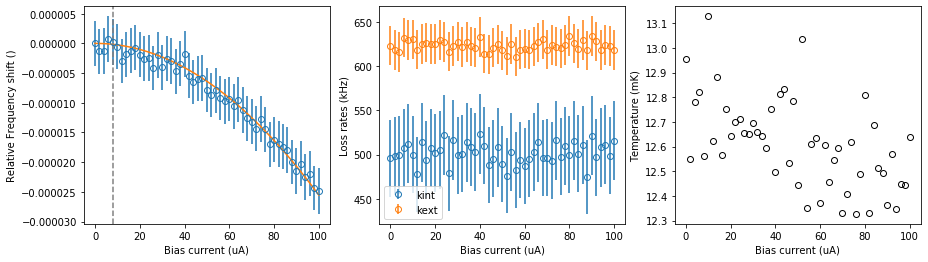

In [11]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4))
plt.sca(ax1)
plt.errorbar(iset/1e-6,ymeas,fmt='o',yerr=dfres/fres,markerfacecolor='none')
plt.plot(iset/1e-6,result.best_fit)
plt.ylabel('Relative Frequency shift ()')
plt.axvline(8,c='grey',ls='--')
plt.sca(ax2)
plt.errorbar(iset/1e-6,kint/1e3,yerr=dkint/1e3,fmt='o',label='kint',markerfacecolor='none')
plt.errorbar(iset/1e-6,kext/1e3,yerr=dkext/1e3,fmt='o',label='kext',markerfacecolor='none')
plt.legend()
plt.ylabel('Loss rates (kHz)')
plt.sca(ax3)
# ax1=plt.gca().twinx()
plt.plot(iset/1e-6,temp/1e-3,'o',c='k',markerfacecolor='none')
plt.ylabel('Temperature (mK)')

for ax in [ax1,ax2,ax3]:
    plt.sca(ax)
    plt.xlabel('Bias current (uA)')
    
plt.show()
plt.close()

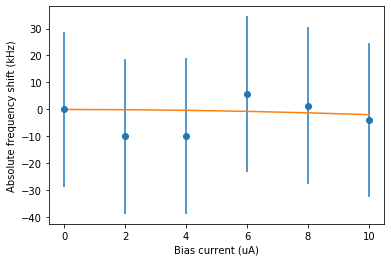

In [12]:
ymeas = fres-fres[0]
plt.errorbar(iset[:6]/1e-6,ymeas[:6]/1e3,fmt='o',yerr=dfres[:6]/1e3)
plt.plot(iset[:6]/1e-6,(result.best_fit*fres)[:6]/1e3)
plt.xlabel('Bias current (uA)')
plt.ylabel('Absolute frequency shift (kHz)')
plt.show()
plt.close()

#### absolute shift with partial geometric inductance

In [38]:
ymeas = fres

mymodel = lmfit.Model(f0Lk)
mymodel.set_param_hint('Istar',min=1e-9,max=100e-3)
mymodel.set_param_hint('alpha',min=alpha*0.95,max=alpha*1.05)
params = mymodel.make_params(fk0=ymeas[0],alpha=alpha,Istar=10e-3)
# params['alpha'].vary=False
result = mymodel.fit(ymeas,params,I=iset,weights=1/dfres)
result.params

Parameters([('fk0',
             <Parameter 'fk0', value=7559975441.586128 +/- 1.53e+03, bounds=[-inf:inf]>),
            ('alpha',
             <Parameter 'alpha', value=0.27661693764433765 +/- 0.576, bounds=[0.253114186851211:0.27975778546712804]>),
            ('Istar',
             <Parameter 'Istar', value=0.007594181808407475 +/- 0.00782, bounds=[1e-09:0.1]>)])

In [39]:
(result.params['fk0'].value-ymeas[0])/ymeas[0]

-8.605780796027704e-07

In [40]:
(result.params['alpha'].value-alpha)/alpha

0.038211623106669965

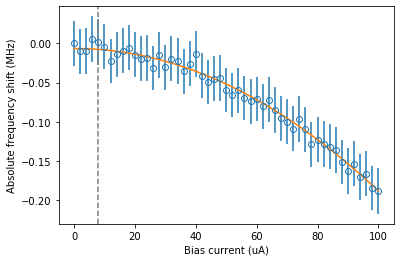

In [41]:
plt.errorbar(iset/1e-6,(ymeas-ymeas[0])/1e6,fmt='o',yerr=dfres/1e6,markerfacecolor='none')
plt.plot(iset/1e-6,(result.best_fit-ymeas[0])/1e6)
plt.ylabel('Absolute frequency shift (MHz)')
plt.axvline(8,c='grey',ls='--')
plt.xlabel('Bias current (uA)')
    
plt.show()
plt.close()

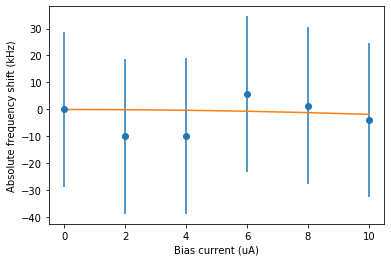

In [44]:
plt.errorbar(iset[:6]/1e-6,(ymeas[:6]-ymeas[0])/1e3,fmt='o',yerr=dfres[:6]/1e3)
plt.plot(iset[:6]/1e-6,(result.best_fit[:6]-result.best_fit[0])/1e3)
plt.xlabel('Bias current (uA)')
plt.ylabel('Absolute frequency shift (kHz)')
plt.show()
plt.close()

In [45]:
pkldict = {'xmeas':iset[:6]/1e-6,'ymeas':(ymeas[:6]-ymeas[0])/1e3,'yerr':dfres[:6]/1e3,
           'ytheo':(result.best_fit[:6]-result.best_fit[0])/1e3,
          'xlabel':'Bias current (uA)','ylabel':'Absolute frequency shift (kHz)'}
pickle.dump(pkldict,open('data_final/SM_freq_shift_ref.pkl','wb'))

### 200 uA bias current

In [18]:
fpath = glob.glob('data_raw/ref2gnd/_test_F1_2019_04_10_15.52.23_VNA_vs_current_200uA_16open/*.dat')
mydata = stlabutils.readdata.readdat(fpath[0])

['Frequency (Hz)', 'S21re ()', 'S21im ()', 'S21dB (dB)', 'S21Ph (rad)', 'Power (dBm)', 'T (K)', 'Time (s)', 'Iset (A)']


In [19]:
iset = []
fres = []
dfres = []
temp = []
kext = []
kint = []
dkext = []
dkint = []

for myline in mydata:
    freqs = myline['Frequency (Hz)'].values
    Iset = myline['Iset (A)'].values[0]
    Temp = myline['T (K)'].values[0]
    S11complex = myline['S21re ()'] + 1j * myline['S21im ()']
    S11complex = S11complex.values
    params, _, _, _ = stlabutils.S11fit(freqs, S11complex, ftype='A', doplots=False)
    # parameters
    iset.append(Iset)
    f0 = params['f0'].value
    df0 = params['f0'].stderr
    Qext = params['Qext'].value
    dQext = params['Qext'].stderr
    Qint = params['Qint'].value
    dQint = params['Qint'].stderr
    # appending
    fres.append(f0)
    dfres.append(df0)
    temp.append(Temp)
    Kext = f0/Qext
    Kint = f0/Qint
    kext.append(f0/Qext)
    kint.append(f0/Qint)
    dkext.append((df0/f0+dQext/Qext)*Kext)
    dkint.append((df0/f0+dQint/Qint)*Kint)

iset = np.array(iset)
fres = np.array(fres)
dfres = np.array(dfres)
temp = np.array(temp)
kext = np.array(kext)
kint = np.array(kint)
dkext = np.array(dkext)
dkint = np.array(dkint)

Max index:  1716  Max frequency:  7560120000.0
Peak limits:  1698 1729
Lower edge:  7558860000.0  Center:  7560120000.0  Upper edge:  7561030000.0  Points in width:  31
2001 2001
-0.01101142554329575 1.8814514323660016e-12 4337.640453592742 -5.827152265105921e-07
[[Variables]]
    a:   0.23410392 +/- 0.44215753 (188.87%) (init = -0.01101143)
    b:  -6.6412e-11 +/- 1.1781e-10 (177.40%) (init = 1.881451e-12)
    c:   4.7444e-21 +/- 7.8478e-21 (165.41%) (init = 0)
    ap:  4318.69669 +/- 0.79659673 (0.02%) (init = 4337.64)
    bp: -5.8026e-07 +/- 1.0613e-10 (0.02%) (init = -5.827152e-07)
    cp:  0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b)   = -1.000
    C(b, c)   = -1.000
    C(ap, bp) = -1.000
    C(a, c)   =  1.000
[[Variables]]
    a:      0.2341039 (fixed)
    b:     -6.641186e-11 (fixed)
    c:      4.744388e-21 (fixed)
    ap:     4318.697 (fixed)
    bp:    -5.802615e-07 (fixed)
    cp:     0 (fixed)
    Qint:   16402.6958 +/- 1561.70848 (9.52%) (

[[Variables]]
    a:      0.99711348 +/- 0.39809037 (39.92%) (init = 0.166991)
    b:     -2.7072e-10 +/- 1.0603e-10 (39.16%) (init = -4.863822e-11)
    c:      1.8421e-20 +/- 7.0595e-21 (38.32%) (init = 3.567798e-21)
    ap:     4311.20196 +/- 0.64610233 (0.01%) (init = 4318.268)
    bp:    -5.7926e-07 +/- 8.5969e-11 (0.01%) (init = -5.802046e-07)
    cp:     0 (fixed)
    Qint:   15233.8167 +/- 1342.66090 (8.81%) (init = 15267.74)
    Qext:   12246.0938 +/- 441.452615 (3.60%) (init = 12262.88)
    f0:     7.5600e+09 +/- 28608.0568 (0.00%) (init = 7.560049e+09)
    theta:  0.05406697 +/- 0.03656731 (67.63%) (init = -0.02497242)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, c)       = -1.000
    C(a, b)       = -1.000
    C(a, c)       =  1.000
    C(ap, bp)     = -1.000
    C(f0, theta)  = -0.723
    C(Qint, Qext) =  0.426
    C(c, theta)   =  0.179
    C(b, theta)   = -0.178
    C(a, theta)   =  0.178
    C(bp, f0)     = -0.136
    C(ap, f0)     =  0.136
    C(c, f0

[[Variables]]
    a:   0.31693132 +/- 0.43763849 (138.09%) (init = -0.01621112)
    b:  -8.8663e-11 +/- 1.1661e-10 (131.52%) (init = 2.58031e-12)
    c:   6.2387e-21 +/- 7.7670e-21 (124.50%) (init = 0)
    ap:  4318.19558 +/- 0.78538432 (0.02%) (init = 4335.165)
    bp: -5.8019e-07 +/- 1.0463e-10 (0.02%) (init = -5.823859e-07)
    cp:  0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b)   = -1.000
    C(b, c)   = -1.000
    C(ap, bp) = -1.000
    C(a, c)   =  1.000
[[Variables]]
    a:      0.3169313 (fixed)
    b:     -8.866324e-11 (fixed)
    c:      6.238732e-21 (fixed)
    ap:     4318.196 (fixed)
    bp:    -5.801945e-07 (fixed)
    cp:     0 (fixed)
    Qint:   15136.3002 +/- 1382.28856 (9.13%) (init = 7482.99)
    Qext:   12126.5525 +/- 454.474889 (3.75%) (init = 6937.723)
    f0:     7.5600e+09 +/- 29591.0409 (0.00%) (init = 7.56005e+09)
    theta: -0.03058095 +/- 0.03747915 (122.56%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
   

[[Variables]]
    a:   0.07799201 +/- 0.43505780 (557.82%) (init = -0.01434027)
    b:  -2.5172e-11 +/- 1.1592e-10 (460.50%) (init = 2.328738e-12)
    c:   2.0211e-21 +/- 7.7211e-21 (382.02%) (init = 0)
    ap:  4317.33966 +/- 0.78273846 (0.02%) (init = 4327.125)
    bp: -5.8008e-07 +/- 1.0428e-10 (0.02%) (init = -5.812944e-07)
    cp:  0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b)   = -1.000
    C(b, c)   = -1.000
    C(ap, bp) = -1.000
    C(a, c)   =  1.000
[[Variables]]
    a:      0.07799201 (fixed)
    b:     -2.517184e-11 (fixed)
    c:      2.021123e-21 (fixed)
    ap:     4317.34 (fixed)
    bp:    -5.800804e-07 (fixed)
    cp:     0 (fixed)
    Qint:   15116.4175 +/- 1364.39225 (9.03%) (init = 8216.381)
    Qext:   12066.0373 +/- 446.254179 (3.70%) (init = 6407.258)
    f0:     7.5600e+09 +/- 29302.6835 (0.00%) (init = 7.55991e+09)
    theta: -0.03660846 +/- 0.03698719 (101.03%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
 

[[Variables]]
    a:      0.2675142 (fixed)
    b:     -7.557656e-11 (fixed)
    c:      5.372407e-21 (fixed)
    ap:     4317.605 (fixed)
    bp:    -5.801155e-07 (fixed)
    cp:     0 (fixed)
    Qint:   14804.8276 +/- 1337.43351 (9.03%) (init = 7659.853)
    Qext:   12133.0934 +/- 454.628797 (3.75%) (init = 6792.2)
    f0:     7.5600e+09 +/- 29873.7888 (0.00%) (init = 7.55998e+09)
    theta: -0.02448341 +/- 0.03747350 (153.06%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(f0, theta)  = -0.711
    C(Qint, Qext) =  0.415
QLoaded =  6668.233818094118
[[Variables]]
    a:      1.07832602 +/- 0.39849227 (36.95%) (init = 0.2675142)
    b:     -2.9244e-10 +/- 1.0613e-10 (36.29%) (init = -7.557656e-11)
    c:      1.9873e-20 +/- 7.0667e-21 (35.56%) (init = 5.372407e-21)
    ap:     4311.13631 +/- 0.64698563 (0.02%) (init = 4317.605)
    bp:    -5.7925e-07 +/- 8.6085e-11 (0.01%) (init = -5.801155e-07)
    cp:     0 (fixed)
    Qint:   14852.3331 +/- 1297.32934 (8.7

[[Variables]]
    a:      1.06490849 +/- 0.39847406 (37.42%) (init = 0.3048891)
    b:     -2.8889e-10 +/- 1.0613e-10 (36.74%) (init = -8.556506e-11)
    c:      1.9638e-20 +/- 7.0663e-21 (35.98%) (init = 6.039695e-21)
    ap:     4311.46129 +/- 0.64768076 (0.02%) (init = 4318.121)
    bp:    -5.7929e-07 +/- 8.6177e-11 (0.01%) (init = -5.801836e-07)
    cp:     0 (fixed)
    Qint:   14747.9554 +/- 1283.29566 (8.70%) (init = 14719.61)
    Qext:   11980.4872 +/- 428.539521 (3.58%) (init = 11963.46)
    f0:     7.5599e+09 +/- 29163.8043 (0.00%) (init = 7.559963e+09)
    theta:  0.03807424 +/- 0.03631379 (95.38%) (init = -0.03731007)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b)       = -1.000
    C(b, c)       = -1.000
    C(a, c)       =  1.000
    C(ap, bp)     = -1.000
    C(f0, theta)  = -0.723
    C(Qint, Qext) =  0.428
    C(c, theta)   =  0.183
    C(b, theta)   = -0.183
    C(a, theta)   =  0.183
    C(bp, f0)     = -0.137
    C(ap, f0)     =  0.136
    C(c, f

[[Variables]]
    a:      1.10726788 +/- 0.39720671 (35.87%) (init = 0.33991)
    b:     -3.0018e-10 +/- 1.0579e-10 (35.24%) (init = -9.487386e-11)
    c:      2.0390e-20 +/- 7.0438e-21 (34.55%) (init = 6.658265e-21)
    ap:     4311.06737 +/- 0.64527041 (0.01%) (init = 4317.98)
    bp:    -5.7924e-07 +/- 8.5856e-11 (0.01%) (init = -5.801645e-07)
    cp:     0 (fixed)
    Qint:   14966.9257 +/- 1308.83938 (8.74%) (init = 14900.07)
    Qext:   12212.3615 +/- 439.878297 (3.60%) (init = 12178.9)
    f0:     7.5598e+09 +/- 28861.4332 (0.00%) (init = 7.559909e+09)
    theta:  0.03788351 +/- 0.03655893 (96.50%) (init = -0.03904326)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b)       = -1.000
    C(b, c)       = -1.000
    C(a, c)       =  1.000
    C(ap, bp)     = -1.000
    C(f0, theta)  = -0.723
    C(Qint, Qext) =  0.429
    C(c, theta)   =  0.182
    C(b, theta)   = -0.181
    C(a, theta)   =  0.181
    C(bp, f0)     = -0.135
    C(ap, f0)     =  0.135
    C(c, f0)  

[[Variables]]
    a:   0.34511799 +/- 0.43385594 (125.71%) (init = -0.01591726)
    b:  -9.6493e-11 +/- 1.1560e-10 (119.80%) (init = 2.540549e-12)
    c:   6.7816e-21 +/- 7.6996e-21 (113.54%) (init = 0)
    ap:  4317.29254 +/- 0.77898350 (0.02%) (init = 4327.736)
    bp: -5.8007e-07 +/- 1.0377e-10 (0.02%) (init = -5.813921e-07)
    cp:  0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b)   = -1.000
    C(b, c)   = -1.000
    C(ap, bp) = -1.000
    C(a, c)   =  1.000
[[Variables]]
    a:      0.345118 (fixed)
    b:     -9.649302e-11 (fixed)
    c:      6.781573e-21 (fixed)
    ap:     4317.293 (fixed)
    bp:    -5.800727e-07 (fixed)
    cp:     0 (fixed)
    Qint:   15677.4929 +/- 1421.84705 (9.07%) (init = 8036.285)
    Qext:   12269.8712 +/- 451.646817 (3.68%) (init = 6521.004)
    f0:     7.5598e+09 +/- 28433.1598 (0.00%) (init = 7.55977e+09)
    theta: -0.02238506 +/- 0.03681132 (164.45%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
  

[[Variables]]
    a:      0.3209218 (fixed)
    b:     -8.988735e-11 (fixed)
    c:      6.331167e-21 (fixed)
    ap:     4317.348 (fixed)
    bp:    -5.800804e-07 (fixed)
    cp:     0 (fixed)
    Qint:   15677.9124 +/- 1425.80131 (9.09%) (init = 7260.685)
    Qext:   12334.4467 +/- 456.786763 (3.70%) (init = 7140.152)
    f0:     7.5598e+09 +/- 28547.6668 (0.00%) (init = 7.55991e+09)
    theta: -0.01444014 +/- 0.03704618 (256.55%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(f0, theta)  = -0.711
    C(Qint, Qext) =  0.407
QLoaded =  6903.323441145799
[[Variables]]
    a:      1.06736943 +/- 0.39546548 (37.05%) (init = 0.3209218)
    b:     -2.8956e-10 +/- 1.0533e-10 (36.37%) (init = -8.988735e-11)
    c:      1.9684e-20 +/- 7.0129e-21 (35.63%) (init = 6.331167e-21)
    ap:     4310.82868 +/- 0.64048666 (0.01%) (init = 4317.348)
    bp:    -5.7921e-07 +/- 8.5220e-11 (0.01%) (init = -5.800804e-07)
    cp:     0 (fixed)
    Qint:   15630.8491 +/- 1374.56483 (8

[[Variables]]
    a:      0.3165824 (fixed)
    b:     -8.883994e-11 (fixed)
    c:      6.268651e-21 (fixed)
    ap:     4317.077 (fixed)
    bp:    -5.800436e-07 (fixed)
    cp:     0 (fixed)
    Qint:   15313.1935 +/- 1388.39151 (9.07%) (init = 7974.06)
    Qext:   12300.8879 +/- 458.533087 (3.73%) (init = 6987.141)
    f0:     7.5597e+09 +/- 29074.4601 (0.00%) (init = 7.55977e+09)
    theta: -0.02012141 +/- 0.03728762 (185.31%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(f0, theta)  = -0.711
    C(Qint, Qext) =  0.411
QLoaded =  6821.370377904048
[[Variables]]
    a:      1.04551474 +/- 0.39900256 (38.16%) (init = 0.3165824)
    b:     -2.8380e-10 +/- 1.0627e-10 (37.45%) (init = -8.883994e-11)
    c:      1.9304e-20 +/- 7.0757e-21 (36.65%) (init = 6.268651e-21)
    ap:     4311.04171 +/- 0.64644426 (0.01%) (init = 4317.077)
    bp:    -5.7924e-07 +/- 8.6012e-11 (0.01%) (init = -5.800436e-07)
    cp:     0 (fixed)
    Qint:   15271.5268 +/- 1345.67287 (8.

[[Variables]]
    a:      0.2192602 (fixed)
    b:     -6.283624e-11 (fixed)
    c:      4.531788e-21 (fixed)
    ap:     4316.494 (fixed)
    bp:    -5.799666e-07 (fixed)
    cp:     0 (fixed)
    Qint:   15273.6869 +/- 1377.42204 (9.02%) (init = 8094.658)
    Qext:   12107.0446 +/- 446.161840 (3.69%) (init = 6896.866)
    f0:     7.5596e+09 +/- 29029.7750 (0.00%) (init = 7.55963e+09)
    theta: -0.02690064 +/- 0.03686232 (137.03%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(f0, theta)  = -0.711
    C(Qint, Qext) =  0.408
QLoaded =  6753.625566664189
[[Variables]]
    a:      0.95781022 +/- 0.39893982 (41.65%) (init = 0.2192602)
    b:     -2.6037e-10 +/- 1.0625e-10 (40.81%) (init = -6.283624e-11)
    c:      1.7740e-20 +/- 7.0746e-21 (39.88%) (init = 4.531788e-21)
    ap:     4310.65428 +/- 0.64563032 (0.01%) (init = 4316.494)
    bp:    -5.7918e-07 +/- 8.5904e-11 (0.01%) (init = -5.799666e-07)
    cp:     0 (fixed)
    Qint:   15163.5093 +/- 1328.12285 (8

[[Variables]]
    a:      0.2414144 (fixed)
    b:     -6.861663e-11 (fixed)
    c:      4.908698e-21 (fixed)
    ap:     4317.396 (fixed)
    bp:    -5.800872e-07 (fixed)
    cp:     0 (fixed)
    Qint:   15514.0787 +/- 1414.86330 (9.12%) (init = 7493)
    Qext:   12339.2746 +/- 460.679282 (3.73%) (init = 6928.276)
    f0:     7.5595e+09 +/- 28915.6438 (0.00%) (init = 7.55956e+09)
    theta: -0.01502265 +/- 0.03735079 (248.63%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(f0, theta)  = -0.711
    C(Qint, Qext) =  0.409
QLoaded =  6872.87002938323
[[Variables]]
    a:      1.07856799 +/- 0.39778941 (36.88%) (init = 0.2414144)
    b:     -2.9252e-10 +/- 1.0595e-10 (36.22%) (init = -6.861663e-11)
    c:      1.9880e-20 +/- 7.0541e-21 (35.48%) (init = 4.908698e-21)
    ap:     4310.99223 +/- 0.64232435 (0.01%) (init = 4317.396)
    bp:    -5.7923e-07 +/- 8.5464e-11 (0.01%) (init = -5.800872e-07)
    cp:     0 (fixed)
    Qint:   15352.3707 +/- 1349.01158 (8.79%)

[[Variables]]
    a:      0.1853544 (fixed)
    b:     -5.358905e-11 (fixed)
    c:      3.90179e-21 (fixed)
    ap:     4317.201 (fixed)
    bp:    -5.800609e-07 (fixed)
    cp:     0 (fixed)
    Qint:   14499.4305 +/- 1301.76834 (8.98%) (init = 7626.587)
    Qext:   12177.4956 +/- 458.408756 (3.76%) (init = 6817.377)
    f0:     7.5594e+09 +/- 30236.1068 (0.00%) (init = 7.55928e+09)
    theta: -0.02554184 +/- 0.03764654 (147.39%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(f0, theta)  = -0.711
    C(Qint, Qext) =  0.419
QLoaded =  6618.706761827322
[[Variables]]
    a:      0.97796097 +/- 0.39962632 (40.86%) (init = 0.1853544)
    b:     -2.6560e-10 +/- 1.0644e-10 (40.07%) (init = -5.358905e-11)
    c:      1.8079e-20 +/- 7.0868e-21 (39.20%) (init = 3.90179e-21)
    ap:     4311.08211 +/- 0.64430581 (0.01%) (init = 4317.201)
    bp:    -5.7924e-07 +/- 8.5730e-11 (0.01%) (init = -5.800609e-07)
    cp:     0 (fixed)
    Qint:   14502.0146 +/- 1260.79560 (8.6

In [20]:
pkldump = {'iset':iset,'fres':fres,'dfres':dfres,'temp':temp,'kext':kext,'kint':kint,'dkext':dkext,'dkint':dkint,'filename':fpath[0]}
pickle.dump(pkldump,open('data_processed/ref2gnd_200uA.pkl','wb'))

#### relative shift fit

In [21]:
pkldump = pickle.load(open('data_processed/ref2gnd_200uA.pkl','rb'))

iset = pkldump['iset']
fres = pkldump['fres']
dfres = pkldump['dfres']
temp = pkldump['temp']
kext = pkldump['kext']
kint = pkldump['kint']
dkext = pkldump['dkext']
dkint = pkldump['dkint']

In [22]:
ymeas = (fres-fres[0])/fres

mymodel = lmfit.Model(f0Lkshift)
params = mymodel.make_params(I1=20e-3,I2=20e-3)
params['I1'].vary = True
params['I2'].vary = True
params['I2'].min = 0
result = mymodel.fit(ymeas,params,I=iset,weights=1/dfres)
result.params

Parameters([('I1', <Parameter 'I1', 0.014591536179073805, bounds=[-inf:inf]>),
            ('I2', <Parameter 'I2', 149.36813504030556, bounds=[0:inf]>)])

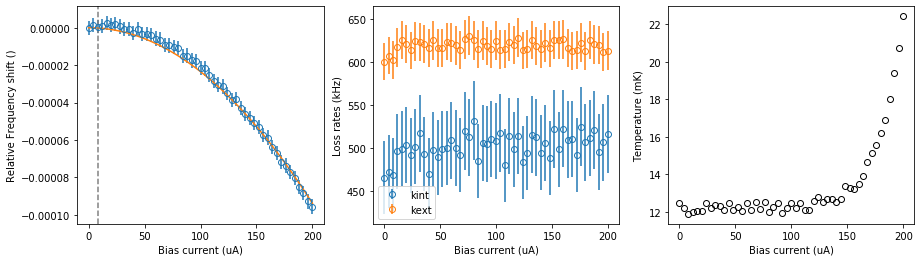

In [23]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4))
plt.sca(ax1)
plt.errorbar(iset/1e-6,ymeas,fmt='o',yerr=dfres/fres,markerfacecolor='none')
plt.plot(iset/1e-6,result.best_fit)
plt.ylabel('Relative Frequency shift ()')
plt.axvline(8,c='grey',ls='--')
plt.sca(ax2)
plt.errorbar(iset/1e-6,kint/1e3,yerr=dkint/1e3,fmt='o',label='kint',markerfacecolor='none')
plt.errorbar(iset/1e-6,kext/1e3,yerr=dkext/1e3,fmt='o',label='kext',markerfacecolor='none')
plt.legend()
plt.ylabel('Loss rates (kHz)')
plt.sca(ax3)
# ax1=plt.gca().twinx()
plt.plot(iset/1e-6,temp/1e-3,'o',c='k',markerfacecolor='none')
plt.ylabel('Temperature (mK)')

for ax in [ax1,ax2,ax3]:
    plt.sca(ax)
    plt.xlabel('Bias current (uA)')
    
plt.show()
plt.close()

#### absolute shift with partial geometric inductance

In [24]:
ymeas = fres

mymodel = lmfit.Model(f0Lk)
mymodel.set_param_hint('Istar',min=1e-9,max=100e-3)
mymodel.set_param_hint('alpha',min=alpha*0.95,max=alpha*1.05)
params = mymodel.make_params(fk0=ymeas[0],alpha=alpha,Istar=10e-3)
params['alpha'].vary=False
result = mymodel.fit(ymeas,params,I=iset,weights=1/dfres)
result.params

Parameters([('fk0',
             <Parameter 'fk0', value=7559976946.2539215 +/- 1.72e+03, bounds=[-inf:inf]>),
            ('alpha',
             <Parameter 'alpha', value=0.2664359861591695 (fixed), bounds=[0.253114186851211:0.27975778546712804]>),
            ('Istar',
             <Parameter 'Istar', value=0.0073545857675842985 +/- 1.89e-05, bounds=[1e-09:0.1]>)])

In [25]:
(result.params['fk0'].value-ymeas[0])/ymeas[0]

2.7866560249379358e-06

In [26]:
(result.params['alpha'].value-alpha)/alpha

0.0

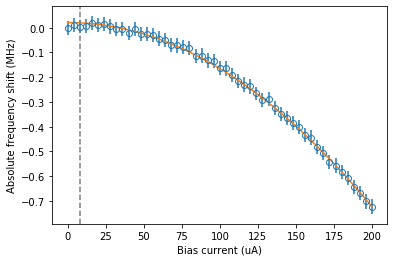

In [27]:
plt.errorbar(iset/1e-6,(ymeas-ymeas[0])/1e6,fmt='o',yerr=dfres/1e6,markerfacecolor='none')
plt.plot(iset/1e-6,(result.best_fit-ymeas[0])/1e6)
plt.ylabel('Absolute frequency shift (MHz)')
plt.axvline(8,c='grey',ls='--')
plt.xlabel('Bias current (uA)')
    
plt.show()
plt.close()

In [29]:
pkldict = {'xmeas':iset/1e-6,'ymeas':ymeas,'yerr':dfres,'ytheo':result.best_fit,
           'kint':kint/1e3,'kext':kext/1e3,'temp':temp/1e-3,
           'dkint':dkint/1e3,'dkext':dkext/1e3,
           'klabel':'Loss rates (kHz)','templabel':'Temperature (mK)',
          'xlabel':'Bias current (uA)','ylabel':'Relative requency shift (kHz)'}
pickle.dump(pkldict,open('data_final/SM_freq_shift_ref_full.pkl','wb'))